In [1]:
import pandas as pd
df = pd.read_csv('./dataset/패션아이템/morpheme-result_Kkma.csv',
                   names=['TEXT'])
df

,TEXT
0,나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 ...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭여행 볼 리비아 라 파 즈 데스 로드 리 리 야경 라 파 즈 시간 ...
3,Made U 스윗 서브 후 리스 반집 업 후드 양털 후드 티 털 상품명 Made U...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 이룸 베스트 상품 보기 무 배 반...
...,...
95864,블랙 야크 여성 반집 업 티셔츠 주황 주문 링크 https cafe naver co...
95865,제이 디 엑스 JDX 여성 이중 리 반집 업 티셔츠 네이비 주문 링크 https c...
95866,제이 디 엑스 JDX 여성 이중 리 반집 업 티셔츠 블랙 할인 주문 링크 https...
95867,남성 폴로 면 반집 업 니트 레드 l xl 라지 기준 여유


In [2]:
df['TEXT']

0        나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 ...
1        커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2        DAY 남미 배낭여행 볼 리비아 라 파 즈 데스 로드 리 리 야경 라 파 즈 시간 ...
3        Made U 스윗 서브 후 리스 반집 업 후드 양털 후드 티 털 상품명 Made U...
4        choiroom 터틀 골지 원피스 니트 세트 뒷면 이룸 베스트 상품 보기 무 배 반...
                               ...                        
95864    블랙 야크 여성 반집 업 티셔츠 주황 주문 링크 https cafe naver co...
95865    제이 디 엑스 JDX 여성 이중 리 반집 업 티셔츠 네이비 주문 링크 https c...
95866    제이 디 엑스 JDX 여성 이중 리 반집 업 티셔츠 블랙 할인 주문 링크 https...
95867                    남성 폴로 면 반집 업 니트 레드 l xl 라지 기준 여유 
95868                                                  NaN
Name: TEXT, Length: 95869, dtype: object

In [6]:
texts =df['TEXT'].values.tolist()
print(texts[0])

나이키 배색 반집 업 후 리스 봉 봉 빈티지 제품명 나이키 배색 반집 업 후 리스 가격 사이즈 총길이 어깨 단면 가슴 단면 제품설명 컨디션 세탁 완료 95-100 


In [8]:
from krwordrank.hangle import normalize

texts = [normalize(str(text), english=True, number=True) for text in texts]

In [9]:
from krwordrank.word import KRWordRank

wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)

scan vocabs ... 
num vocabs = 29215
done = 10


In [10]:
for word, r in sorted(keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

     아노락:	231.0150
      판매:	101.4240
      사이:	100.8150
      반집:	100.7895
     com:	94.5995
     티셔츠:	77.5124
      가격:	76.9135
      kr:	68.0854
      상품:	65.0481
      자켓:	64.0822
      제품:	60.3824
      거래:	59.7178
      후드:	56.9063
      번개:	49.9617
      하프:	49.2243
      장터:	47.6535
      남성:	41.5982
products:	41.0014
      블랙:	39.5879
      나이:	38.0164
      여성:	37.9252
      니트:	37.3404
    http:	36.7727
      기모:	28.2630
      공구:	28.0009
      골프:	27.1794
      패딩:	26.2631
      바람:	25.5982
      개인:	25.1774
     맨투맨:	24.6759


In [13]:
stopwords = {}
passwords = {word: score for word, score in sorted(
    keywords.items(), key=lambda x: -x[1])[:300] if not (word in stopwords)}

In [14]:
from krwordrank.word import summarize_with_keywords

keywords = summarize_with_keywords(
    texts, min_count=5, max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts)  # with default arguments

scan vocabs ... 
num vocabs = 29215
done = 10


In [15]:
from wordcloud import WordCloud

# Set your font path
font_path = 'YOUR_FONT_DIR/truetype/nanum/NanumBarunGothic.ttf'

krwordrank_cloud = WordCloud(
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

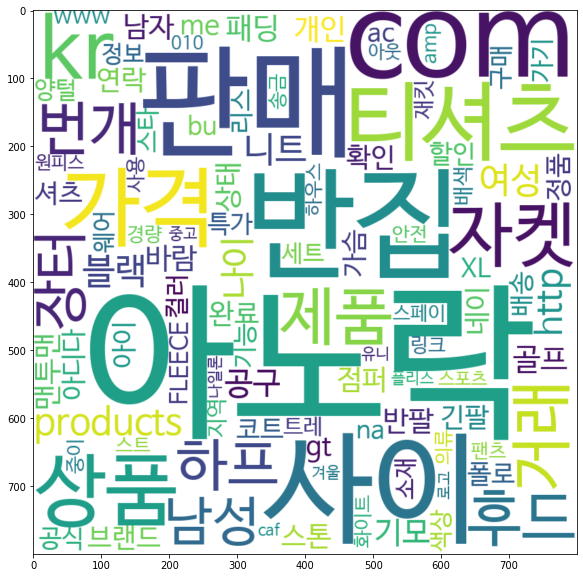

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [17]:
# fig.savefig('./result_img/7_KKMA-2-KRWordRank_[ZIPUP].png')